In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
from sklearn.metrics import r2_score


In [2]:
# df = pd.read_csv('projectfinal.csv')
df = pd.read_csv('Clientonly.csv').drop(columns = 'Unnamed: 0', axis = 1)
df.head()

,the,most,more,enough,not,maybe,diverse,thats,looks,racist,...,fairy,leprechaun,fictional,fairies,queer,acorns,wings,fruity,girly,gays
0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# try: 
#     df = pd.read_csv
# except:
#     # run scraper

In [3]:
df.shape

(2140, 7583)

In [4]:
df['Type'].unique()

array(['Racists', 'Felon', 'Dunces', 'Deadbeats', 'ChaoticGood',
       'Cryptic', 'Sexist', 'Ingrates', 'Frenemies', 'Homophobes'],
      dtype=object)

### turn this into a Binary Classification


In [5]:

df['Type'] = np.where(
    df['Type'] == 'Deadbeats', # Condition
    1, # Return this if True
    0, # Return this if False
)

df['Type'].unique()

array([0, 1])

In [6]:
df['Type'].value_counts()

0    1697
1     443
Name: Type, dtype: int64

##### Need to take this and export at THIS point to CSV and work from there in the streamlit file...

### Run Random Forest on it

In [7]:
# get the features
features = df[[col for col in df != 'Type']].fillna(0)

features.head()

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,the,most,more,enough,not,maybe,diverse,thats,looks,racist,...,fairy,leprechaun,fictional,fairies,queer,acorns,wings,fruity,girly,gays
0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# remove the null values from the features df
# for col in list(features):
#     features[col].fillna(0, inplace = True)

# features.head()

,the,most,more,enough,not,maybe,diverse,thats,looks,racist,...,fairy,leprechaun,fictional,fairies,queer,acorns,wings,fruity,girly,gays
0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
features.sum().value_counts()

1.0       3934
2.0       1172
3.0        558
4.0        322
5.0        228
          ... 
129.0        1
1104.0       1
49.0         1
257.0        1
583.0        1
Length: 214, dtype: int64

In [10]:
features.sum().sum()

99132.0

In [11]:
# identify the target
target = df['Type']

target.value_counts()

0    1697
1     443
Name: Type, dtype: int64

In [49]:
443 / (1697 + 443) # so about 20% of the data are Deadbeats

0.20700934579439254

In [12]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
	features,
	target,
	test_size  = 0.2,
	random_state = 42,
)

train_X

,the,most,more,enough,not,maybe,diverse,thats,looks,racist,...,fairy,leprechaun,fictional,fairies,queer,acorns,wings,fruity,girly,gays
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2122,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,14.0,0.0,1.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.ensemble import RandomForestClassifier

# generate the instance of the Model
rf = RandomForestClassifier(n_estimators = 100)

# fit the Model with training data
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
predictions = rf.predict(test_X)
predictions

# score the model
# rf.score(test_X, test_y) # returns 1 with n_estimators equal to 100, 1000 or 10,000. something is wrong.
r2_score(predictions, test_y)

0.8934073362507561

In [50]:
predictions

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [15]:
from sklearn.naive_bayes import MultinomialNB

multinomial = MultinomialNB().fit(train_X, train_y)

multinomial.score(test_X, test_y) # returns 0.8156

0.9252336448598131

In [16]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression().fit(train_X, train_y)

LogReg.score(train_X, train_y) # returns a 1


/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

### Work with a scaler to normalize the data? try a few

In [17]:
# from sklearn.preprocessing import MinMaxScaler

# rescaled = MinMaxScaler().fit_transform(iqr['age'].values.reshape(-1, 1))
#  # create an instance of the Scaler, can chain the next line if needed

# rescaled[:5]


from sklearn.preprocessing import MinMaxScaler

rescaled = MinMaxScaler().fit_transform(features)

rescaled[:5]

array([[0.01694915, 0.2       , 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01694915, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
	rescaled,
	target,
	test_size  = 0.2,
	random_state = 42,
)


minmax_multinomial = MultinomialNB().fit(train_X, train_y)

minmax_multinomial.score(test_X, test_y) 

0.955607476635514

In [19]:
minmax_logreg = LogisticRegression().fit(train_X, train_y)

minmax_logreg.score(test_X, test_y)

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [20]:
pred_proba_y = minmax_multinomial.predict_proba(test_X)
pred_proba_y

array([[9.94842403e-01, 5.15759691e-03],
       [9.33124210e-01, 6.68757896e-02],
       [7.81474692e-01, 2.18525308e-01],
       [6.84491409e-01, 3.15508591e-01],
       [2.06875311e-03, 9.97931247e-01],
       [9.55406381e-01, 4.45936188e-02],
       [7.72658621e-03, 9.92273414e-01],
       [9.06146319e-01, 9.38536810e-02],
       [9.22753237e-01, 7.72467628e-02],
       [2.00234224e-03, 9.97997658e-01],
       [6.94153245e-02, 9.30584675e-01],
       [7.08427041e-01, 2.91572959e-01],
       [9.06013115e-01, 9.39868854e-02],
       [7.34842238e-03, 9.92651578e-01],
       [6.23260881e-03, 9.93767391e-01],
       [9.85776372e-01, 1.42236276e-02],
       [8.89489224e-01, 1.10510776e-01],
       [9.98547511e-01, 1.45248889e-03],
       [9.16086355e-01, 8.39136451e-02],
       [9.61763742e-02, 9.03823626e-01],
       [9.90565489e-01, 9.43451090e-03],
       [9.99617811e-01, 3.82189234e-04],
       [9.88061693e-01, 1.19383068e-02],
       [9.20026028e-01, 7.99739719e-02],
       [8.656507

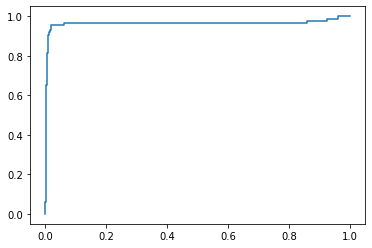

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

false_pos_rates, true_pos_rates, _ = roc_curve(test_y, pred_proba_y[:, 1]) # this is running the multinomialNB after the minmax scaler

plt.plot(false_pos_rates, true_pos_rates)

In [22]:
auc = roc_auc_score(test_y, pred_proba_y[:, 1])

auc

0.9631102951176391

### TF-IDF

In [23]:
# TERM FREQUENCY
def tf(bag_of_words):
    totals = bag_of_words.sum()
    num_words = totals.sum()
    return totals / num_words

# tf(bag_of_words).sort_values(ascending = False)

# INVERSE DOCUMENT FREQUENCY
from math import log

def idf(bag_of_words):
    num_docs = bag_of_words.shape[0]
    doc_freq = bag_of_words.notnull().sum()
    return (num_docs / doc_freq).apply(log)

# idf(bag_of_words)

# COMBINE THEM
def tf_idf(bag_of_words):
    return tf(bag_of_words) * idf(bag_of_words)

tf_idf(df).sort_values(ascending = False)#.describe()

the        0.022024
to         0.021681
and        0.018337
i          0.018264
a          0.018191
             ...   
orleans    0.000077
sixty      0.000077
homeme     0.000077
fools      0.000077
Type       0.000000
Length: 7583, dtype: float64

In [24]:
tfidfdf = tf_idf(df).sort_values(ascending = False)[:100].reset_index()

drop_words = tfidfdf['index'].unique()

drop_words

array(['the', 'to', 'and', 'i', 'a', 'you', 'it', 'for', 'we', 'of', 'me',
       'that', 'this', 'my', 'is', 'in', 'have', 'on', 'do', 'can', 'but',
       'not', 'be', 'what', 'like', 'dont', 'just', 'so', 'with', 'need',
       'your', 'no', 'was', 'im', 'are', 'want', 'its', 'work', 'know',
       'well', 'if', 'would', 'get', 'all', 'will', 'at', 'they', 'how',
       'make', 'as', 'he', 'client', 'an', 'about', 'our', 'them', 'pay',
       'why', 'oh', 'thats', 'up', 'ill', 'more', 'were', 'from', 'one',
       'cant', 'send', 'website', 'could', 'out', 'there', 'now', 'going',
       'some', 'time', 'really', 'email', 'look', 'youre', 'yes', 'or',
       'didnt', 'had', 'when', 'then', 'her', 'logo', 'sent', 'did',
       'great', 'she', 'think', 'right', 'see', 'by', 'use', 'sure',
       'too', 'these'], dtype=object)

In [25]:
# filter the original df to drop columns if they appear in drop_words.
# also add to drop_words our other stop_words list from the previous bag-of-words lab

In [26]:
dropdf = df.drop(columns = drop_words, axis = 1)
dropdf
# dropdf.columns

,most,enough,maybe,diverse,looks,racist,those,stereotypes,americans,african,...,fairy,leprechaun,fictional,fairies,queer,acorns,wings,fruity,girly,gays
0,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
2137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [27]:
dropdf.shape

(2140, 7483)

In [28]:
features = dropdf[[col for col in dropdf != 'Type']].fillna(0)
target = dropdf['Type']

# minmax scaler

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
	features,
	target,
	test_size  = 0.2,
	random_state = 42,
)

train_X

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,most,enough,maybe,diverse,looks,racist,those,stereotypes,americans,african,...,fairy,leprechaun,fictional,fairies,queer,acorns,wings,fruity,girly,gays
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# random forest

droprf = RandomForestClassifier().fit(train_X, train_y)
droprf.score(test_X, test_y)




/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9719626168224299

In [30]:
# multinomialNB

dropmultiNB = MultinomialNB().fit(train_X, train_y)
dropmultiNB.score(test_X, test_y)

dropmultiNB_predictions = dropmultiNB.predict(test_X)

r2_score(dropmultiNB_predictions, test_y)

0.5887850467289719

In [31]:
rescaled = MinMaxScaler().fit_transform(features)

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
	rescaled,
	target,
	test_size  = 0.2,
	random_state = 42,
)


droprescalemultiNB = MultinomialNB().fit(train_X, train_y)
dropmultiNB.score(test_X, test_y)

0.8785046728971962

In [32]:
# rescaled_features = pd.DataFrame(rescaled)

# rescaled_features.head()


# next steps 
# k nearest neighbors (knn)
# confusion matrix - how to visualize that, heatmap the confusion matrix? 
# throw these into streamlit and 
# alternate other scalers? 

In [33]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler().fit(train_X)
# scalar.transform(train_X)[:5]

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_robust = KNeighborsClassifier(n_neighbors = 3)
knn_robust.fit(train_X, train_y.values.ravel())

knn_robust.score(test_X, test_y)

1.0

In [35]:
predictions = knn_robust.predict(test_X)

In [36]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:

r2_score(predictions, test_y)

1.0

In [38]:
test_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
dropdf.to_csv('clientfinaldropped.csv', index = False)

In [45]:
dropdf['Type'].value_counts()

0    1697
1     443
Name: Type, dtype: int64

In [46]:
dropdf.isna().sum()

most       2112
enough     2086
maybe      2079
diverse    2137
looks      2023
           ... 
acorns     2139
wings      2139
fruity     2139
girly      2139
gays       2139
Length: 7483, dtype: int64

In [47]:
dropdf.head()

,most,enough,maybe,diverse,looks,racist,those,stereotypes,americans,african,...,fairy,leprechaun,fictional,fairies,queer,acorns,wings,fruity,girly,gays
0,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
